In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [8]:
insurance_df = pd.read_csv('train.csv')

In [9]:
insurance_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

**Data Analysis**

In [5]:
insurance_df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [6]:
insurance_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
insurance_df.shape

(381109, 12)

In [8]:
categorical_columns=[]
continuous_columns=[]
for col in insurance_df.columns:
    if insurance_df[col].dtype!='object':
        continuous_columns.append(col)
    else:
        categorical_columns.append(col)

In [9]:
continuous_columns

['id',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

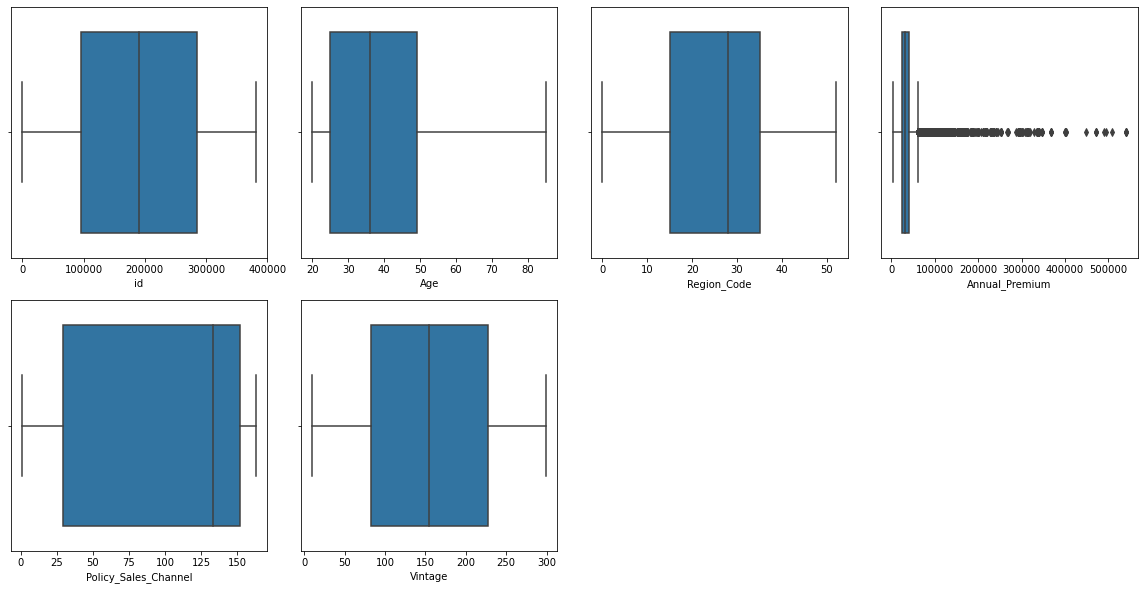

In [10]:
plt.figure(figsize=(16,16))
for i, col in enumerate(['id','Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']):
    plt.subplot(4,4,i+1)
    sns.boxplot(insurance_df[col])
    plt.tight_layout()

In [11]:
insurance_df.loc[insurance_df.Annual_Premium> 400000,'Annual_Premium']=400000

    I don't see much outliers except in Annual_Premium, We will replace premium values greater than 400000 with 400000

In [12]:
insurance_df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

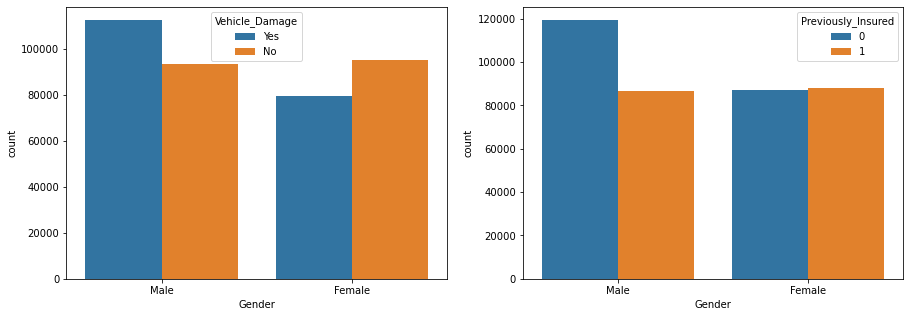

In [13]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=insurance_df,x='Gender',hue='Vehicle_Damage',ax=ax[0])
sns.countplot(data=insurance_df,x='Gender',hue='Previously_Insured',ax=ax[1])
fig.show()

We clearly see that male have more vehicle damage than female, even then male don't have insurance.

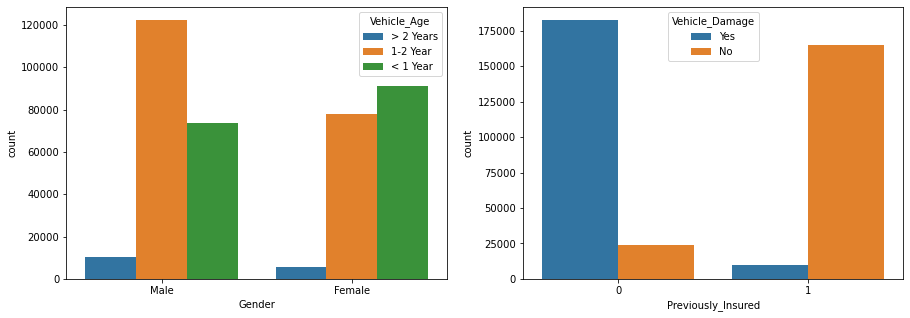

In [14]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=insurance_df,x='Gender',hue='Vehicle_Age',ax=ax[0])
sns.countplot(data=insurance_df,x='Previously_Insured',hue='Vehicle_Damage',ax=ax[1])
fig.show()

I see most of the vehicles are new(less than two years). People have't got insuranced for new vehicles.<BR>
It is surprsing that many vehicles within 2 years have got so much damage.

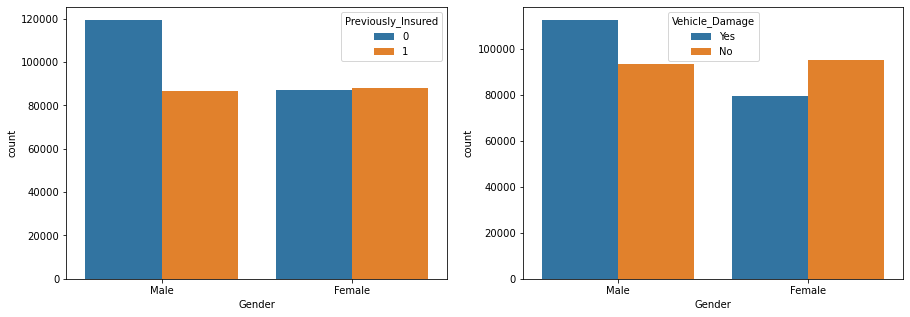

In [15]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
# fig, ax = plt.subplots() 
sns.countplot(data=insurance_df,x='Gender',hue='Previously_Insured',ax=ax[0])
sns.countplot(data=insurance_df,x='Gender',hue='Vehicle_Damage',ax=ax[1])
fig.show()

<Figure size 1440x648 with 0 Axes>

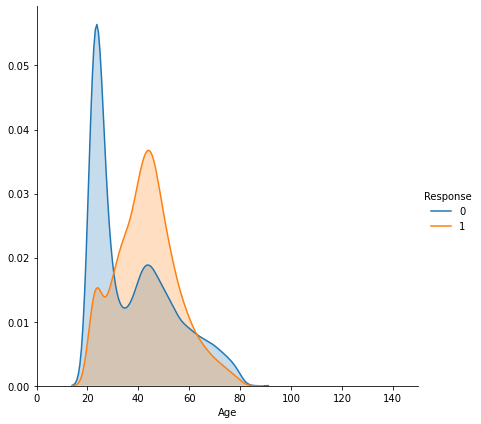

In [16]:
plt.figure(figsize=(20,9))
sns.FacetGrid(insurance_df, hue = 'Response',
             height = 6,xlim = (0,150)).map(sns.kdeplot, 'Age', shade = True,bw=2).add_legend()

Age is almost normally distributed for people who are interested in buying insurance. People with age nearly 30 are more interested in buying insurance.<br>
I think young people doesn't like to get insurance.

<Figure size 1440x648 with 0 Axes>

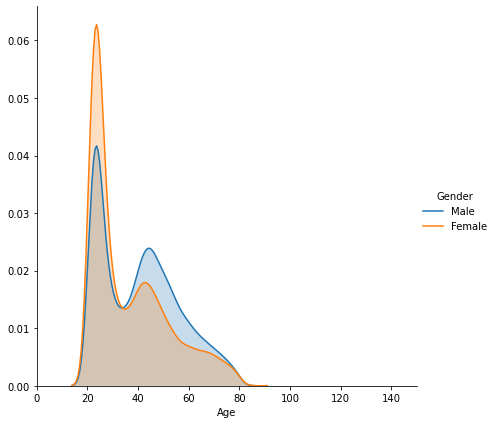

In [17]:
plt.figure(figsize=(20,9))
sns.FacetGrid(insurance_df, hue = 'Gender',
             height = 6,xlim = (0,150)).map(sns.kdeplot, 'Age', shade = True,bw=2).add_legend()

I see no much signifiant difference in age vs gender

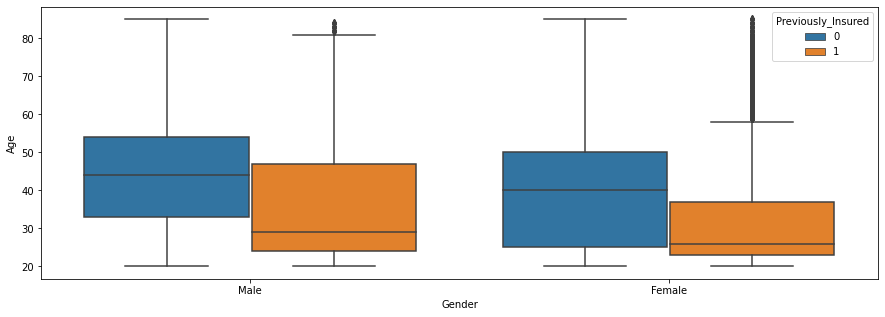

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Age', x ='Gender', hue="Previously_Insured", data=insurance_df)

Females have got insurance at young age.

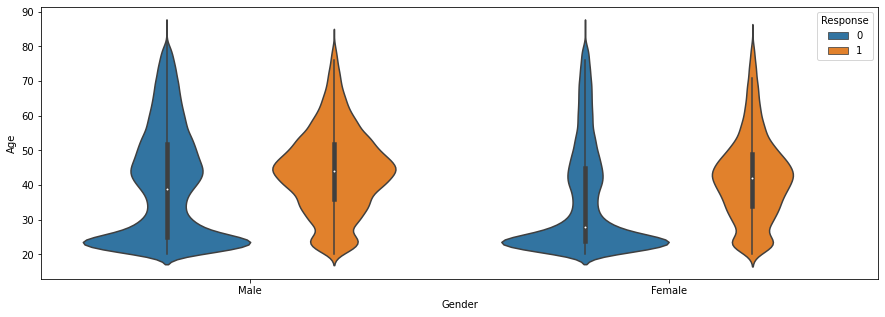

In [19]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Age', x ='Gender', hue="Response", data=insurance_df)

As I said previously young doesn't like to get insurance, when we drill down further we see that
* People who like to get insurence their age is normally distributed. The mean age of both are nearly 45 years.
* Both young male and female doesn't like to buy insurance, distributed is right skewed.
* But the mean age of male and female, who is not interested to buy insurance, has huge difference.

**With this we move to modelling**

In [20]:
le = LabelEncoder()
insurance_df['Gender'] = le.fit_transform(insurance_df['Gender'])
insurance_df['Driving_License'] = le.fit_transform(insurance_df['Driving_License'])
insurance_df['Previously_Insured'] = le.fit_transform(insurance_df['Previously_Insured'])
insurance_df['Vehicle_Damage'] = le.fit_transform(insurance_df['Vehicle_Damage'])
insurance_df['Driving_License'] = le.fit_transform(insurance_df['Driving_License'])
insurance_df['Vehicle_Age'] = le.fit_transform(insurance_df['Vehicle_Age'])

In [21]:
insurance_df=insurance_df[['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']]

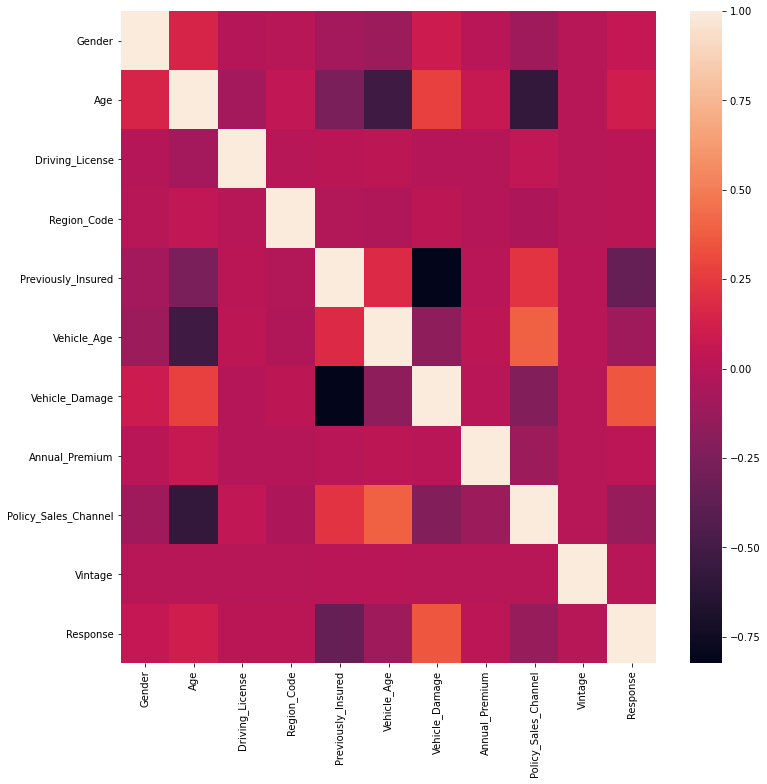

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(insurance_df.corr())